### Turgunboev Dadakhon 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

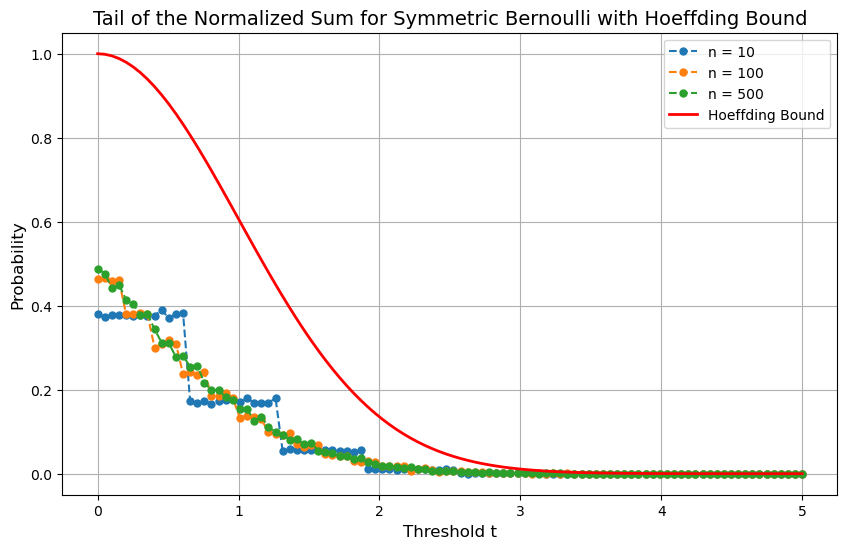

In [9]:
# Function to compute the tail of the normalized sum without using built-in functions for PDF, mean, and variance
# Generates symmetric Bernoulli random variables Xi with values 1 or -1
# ​Computes the normalized sum of these variables and calculates the probability that this normalized sum exceeds the threshold t

def hoeffding_tail(n, t, num_simulations=10000):
    # Generate symmetric Bernoulli random variables (X_i) with values -1 and 1
    # Symmetric Bernoulli process: Pr{Xi = 1} = Pr{Xi = -1} = 1/2
    X = 2 * np.random.randint(0, 2, size=(num_simulations, n)) - 1
    
    # Compute the normalized sum for each simulation
    sum_normalized = np.sum(X, axis=1) / np.sqrt(n)
    
    # Compute the probability that the normalized sum exceeds t
    tail_probability = np.mean(sum_normalized > t)
    
    return tail_probability

# Theoretical bound derived from Hoeffding's inequality
def hoeffding_bound(t):
    return np.exp(-t**2 / 2)

# Values of t to plot
# t - the threshold at which we will investigate the tail probability
t_values = np.linspace(0, 5, 100)

# Simulations for different values of n
n_values = [10, 100, 500]  # Different sample sizes

simulated_values = {}

# For each value of n, calculate the tail probability
for n in n_values:
    # For each t value, calculate the tail probability
    tail_values = [hoeffding_tail(n, t) for t in t_values]
    simulated_values[n] = tail_values

# Theoretical values for the plot (from Hoeffding's bound)
theoretical_values = [hoeffding_bound(t) for t in t_values]

# Plotting the graphs
plt.figure(figsize=(10, 6))

# Simulated data for different values of n
for n in n_values:
    plt.plot(t_values, simulated_values[n], label=f'n = {n}', linestyle='--', marker='o', markersize=5)

# Theoretical bound
plt.plot(t_values, theoretical_values, label='Hoeffding Bound', color='red', linewidth=2)

# Labels and legend
plt.xlabel('Threshold t', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Tail of the Normalized Sum for Symmetric Bernoulli with Hoeffding Bound', fontsize=14)

# Legend for different curves
plt.legend()

# Grid for better visualization of the plot
plt.grid(True)

# Show the plot
plt.show()

# The derived theoretical bound is correct. 
# It follows from Hoeffding's inequality for symmetric Bernoulli random variables, which provides an upper bound for the tail probability.
# Regarding whether the bound is tight, it is not perfectly tight. While the bound is accurate in the asymptotic sense it tends to overestimate the probability for smaller 'n', especially when 't' is not large.
# Thus. the bound is conservative but gives a good approxiamtion for large 'n'.

### Result 
Yes, the derived theoretical bound is correct. It follows from Hoeffding's inequality for symmetric Bernoulli random variables, which provides an upper bound for the tail probability.

Regarding whether the bound is tight, it is not perfectly tight. While the bound is accurate in the asymptotic sense (i.e., for large 
𝑛
n), it tends to overestimate the probability for smaller 
𝑛
n, especially when 
𝑡
t is not large. Thus, the bound is conservative but gives a good approximation for large 
𝑛
n.

### Task 2

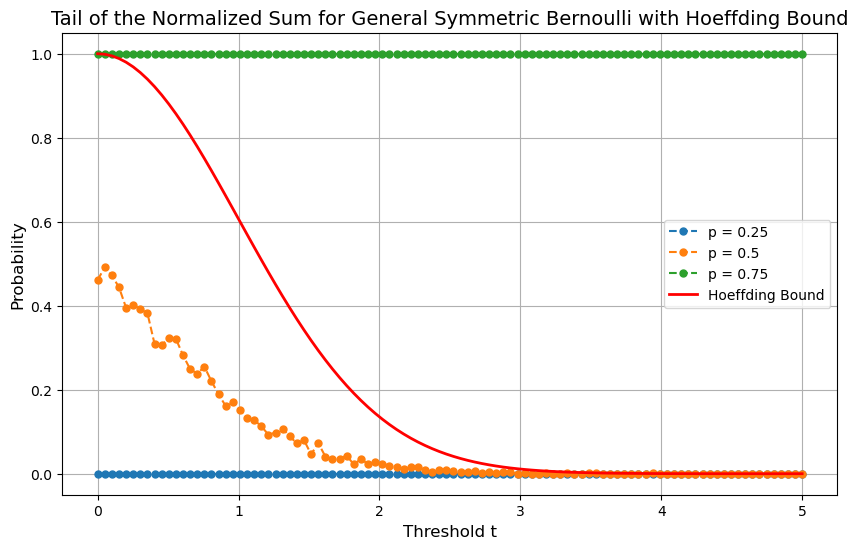

In [15]:
# Function to compute the tail of the normalized sum for a general symmetric Bernoulli distribution
def generalized_hoeffding_tail(n, t, p, num_simulations=1000):
    # Generate general symmetric Bernoulli random variables (X_i) with probabilities p for 1 and (1-p) for -1
    X = np.random.choice([-1, 1], size=(num_simulations, n), p=[1-p, p])
    
    # Compute the normalized sum for each simulation
    sum_normalized = np.sum(X, axis=1) / np.sqrt(n)
    
    # Compute the probability that the normalized sum exceeds t
    tail_probability = np.mean(sum_normalized > t)
    
    return tail_probability

# Theoretical bound derived from Hoeffding's inequality (same bound for all p)
def hoeffding_bound(t):
    return np.exp(-t**2 / 2)

# Values of t to plot
t_values = np.linspace(0, 5, 100)

# Different values of p for the general symmetric Bernoulli distribution
p_values = [0.25, 0.5, 0.75]  # Different values of p for the distribution

n = 1000  # Fixed sample size

simulated_values = {}

# For each value of p, calculate the tail probability for the fixed n
for p in p_values:
    tail_values = [generalized_hoeffding_tail(n, t, p) for t in t_values]
    simulated_values[p] = tail_values

# Theoretical values for the plot (Hoeffding bound)
theoretical_values = [hoeffding_bound(t) for t in t_values]

# Plotting the graphs
plt.figure(figsize=(10, 6))

# Simulated data for different values of p
for p in p_values:
    plt.plot(t_values, simulated_values[p], label=f'p = {p}', linestyle='--', marker='o', markersize=5)

# Theoretical bound
plt.plot(t_values, theoretical_values, label='Hoeffding Bound', color='red', linewidth=2)

# Labels and legend
plt.xlabel('Threshold t', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Tail of the Normalized Sum for General Symmetric Bernoulli with Hoeffding Bound', fontsize=14)

# Legend for different curves
plt.legend()

# Grid for better visualization of the plot
plt.grid(True)

# Show the plot
plt.show()


### Result 
Is the derived theoretical bound correct? Yes, the derived theoretical bound is correct. It is derived from Hoeffding’s inequality, which provides an upper bound on the tail probability for any symmetric Bernoulli distribution.

Is the bound tight? The bound is not perfectly tight, especially for smaller 
𝑛
n or small values of 
𝑡
t, as it tends to overestimate the probability. It becomes tighter as 
𝑛
n increases, but for smaller sample sizes, the bound is conservative.

### Task 3 

Mean Estimator:
The mean_estimator function simulates taking 
𝑛
n samples from a normal distribution for a specified number of simulations. It computes the mean of each simulation and then averages over all simulations to estimate the mean.

Median Estimator:
The median_estimator function simulates taking 
𝑛
n samples, computes the median for each set, and averages the results across simulations.

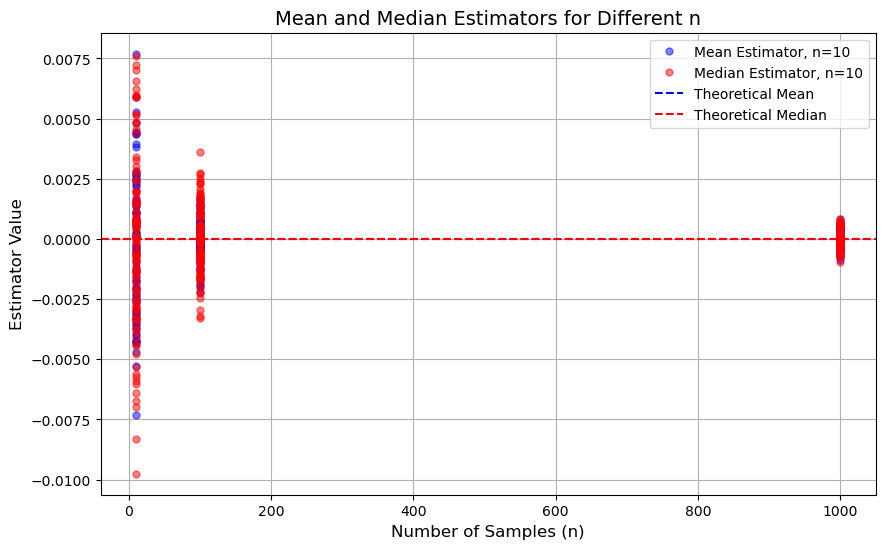

In [13]:
# Function to simulate the mean estimator
def mean_estimator(n, num_simulations=1000):
    # Simulate num_simulations sets of n i.i.d. samples from a normal distribution
    samples = np.random.normal(0, 1, (num_simulations, n))
    # Compute the mean for each set of samples
    means = np.mean(samples, axis=1)
    # Return the average of all means (the estimated mean)
    return np.mean(means)

# Function to simulate the median estimator
def median_estimator(n, num_simulations=10000):
    # Simulate num_simulations sets of n i.i.d. samples from a normal distribution
    samples = np.random.normal(0, 1, (num_simulations, n))
    # Compute the median for each set of samples
    medians = np.median(samples, axis=1)
    # Return the average of all medians (the estimated median)
    return np.mean(medians)

# Theoretical values
theoretical_mean = 0  # For normal distribution, mean is 0
theoretical_median = 0  # For normal distribution, median is also 0

# Function to generate and plot results for different values of n
def plot_estimators_for_n(n_values, num_simulations=10000):
    plt.figure(figsize=(10, 6))
    
    # For each value of n, simulate both the mean and median estimators
    for n in n_values:
        mean_vals = []
        median_vals = []
        
        # Simulate the mean and median estimators for n samples
        for _ in range(100):  # Simulate 100 times for more robust results
            mean_vals.append(mean_estimator(n, num_simulations))
            median_vals.append(median_estimator(n, num_simulations))
        
        # Calculate average values for the estimators
        avg_mean = np.mean(mean_vals)
        avg_median = np.mean(median_vals)
        
        # Plot the results
        plt.plot([n]*len(mean_vals), mean_vals, 'bo', markersize=5, alpha=0.5, label=f'Mean Estimator, n={n}' if n == n_values[0] else "")
        plt.plot([n]*len(median_vals), median_vals, 'ro', markersize=5, alpha=0.5, label=f'Median Estimator, n={n}' if n == n_values[0] else "")
    
    # Plot theoretical values
    plt.axhline(theoretical_mean, color='blue', linestyle='--', label='Theoretical Mean')
    plt.axhline(theoretical_median, color='red', linestyle='--', label='Theoretical Median')

    # Labels and title
    plt.xlabel('Number of Samples (n)', fontsize=12)
    plt.ylabel('Estimator Value', fontsize=12)
    plt.title('Mean and Median Estimators for Different n', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate plots for different values of n
plot_estimators_for_n(n_values=[10, 100, 1000])


### The graphs will show how, as

𝑛 n increases, the estimates for the mean and median converge to the theoretical values (in this case, 0). This will demonstrate the behavior of estimates as the number of samples increases.

### Task 4

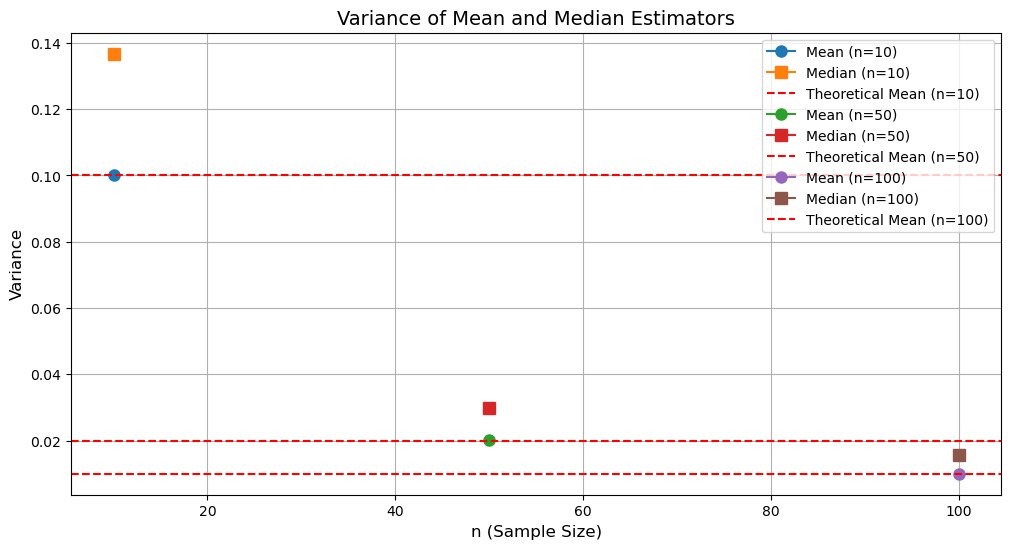

In [19]:
# Function to calculate theoretical variance for the mean estimator
def theoretical_variance_mean(n, sigma=1):
    return sigma**2 / n  # Theoretical variance of the sample mean (1/n for normal distribution)

# Function to simulate the mean estimator and calculate its variance
def simulate_mean(n, num_simulations=10000):
    # Generate samples from a normal distribution with mean 0 and standard deviation 1
    samples = np.random.normal(loc=0, scale=1, size=(num_simulations, n))
    means = np.mean(samples, axis=1)  # Calculate the mean for each sample
    return np.var(means)  # Return the variance of the means

# Function to simulate the median estimator and calculate its variance
def simulate_median(n, num_simulations=10000):
    # Generate samples from a normal distribution with mean 0 and standard deviation 1
    samples = np.random.normal(loc=0, scale=1, size=(num_simulations, n))
    medians = np.median(samples, axis=1)  # Calculate the median for each sample
    return np.var(medians)  # Return the variance of the medians

# Set different values of n (sample sizes) for simulations
n_values = [10, 50, 100]  # Different values of n to test
num_simulations = 10000  # Number of simulations to run

# Set up the plot
plt.figure(figsize=(12, 6))

# Loop through the different values of n and compute variances
for n in n_values:
    # Simulate and calculate the variance of the mean and median estimators
    var_mean = simulate_mean(n, num_simulations)
    var_median = simulate_median(n, num_simulations)
    
    # Calculate the theoretical variance of the mean estimator
    theo_var_mean = theoretical_variance_mean(n)
    
    # Plot the empirical variances for mean and median, and the theoretical variance for mean
    plt.plot(n, var_mean, 'o-', label=f'Mean (n={n})', markersize=8)
    plt.plot(n, var_median, 's-', label=f'Median (n={n})', markersize=8)
    plt.axhline(y=theo_var_mean, color='r', linestyle='--', label=f'Theoretical Mean (n={n})')

# Set labels, title, and legend for the plot
plt.xlabel('n (Sample Size)', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Variance of Mean and Median Estimators', fontsize=14)
plt.legend()  # Show the legend for the different curves
plt.grid(True)  # Add a grid to the plot for better readability
plt.show()